In [1]:
import altair as alt 
import pandas as pd
import requests

In [2]:
data_url = "https://raw.githubusercontent.com/thohan88/covid19-nor-data/HEAD/data"
r = requests.get(f"{data_url}/01_infected/msis/municipality.csv")
r.raise_for_status()

In [3]:
import io
df = raw_data = pd.read_csv(io.BytesIO(r.content), parse_dates=["date"])
df

date             date_time  kommune_no    kommune_name  fylke_no  \
0     2020-03-26  2020-03-26T04:00:00Z         301            Oslo         3   
1     2020-03-26  2020-03-26T04:00:00Z        1101       Eigersund        11   
2     2020-03-26  2020-03-26T04:00:00Z        1103       Stavanger        11   
3     2020-03-26  2020-03-26T04:00:00Z        1106       Haugesund        11   
4     2020-03-26  2020-03-26T04:00:00Z        1108         Sandnes        11   
...          ...                   ...         ...             ...       ...   
91643 2020-12-07  2020-12-07T04:00:00Z        5442         Nesseby        54   
91644 2020-12-07  2020-12-07T04:00:00Z        5443       Båtsfjord        54   
91645 2020-12-07  2020-12-07T04:00:00Z        5444    Sør-Varanger        54   
91646 2020-12-07  2020-12-07T04:00:00Z        9998        Svalbard        99   
91647 2020-12-07  2020-12-07T04:00:00Z        9999  Ukjent Kommune        99   

              fylke_name  population  cases  
0                   Oslo      693494    743  
1               Rogaland       14811      6  
2               Rogaland      143574     87  
3               Rogaland       37357     41  
4               Rogaland       79537     34  
...                  ...         ...    ...  
91643  Troms og Finnmark         926      1  
91644  Troms og Finnmark        2221      7  
91645  Troms og Finnmark       10158     20  
91646           Svalbard           0      0  
91647       Ukjent Fylke           0    265  

[91648 rows x 8 columns]

In [4]:
raw_data["cases_per_100k"] = raw_data["cases"] / (raw_data["population"] / 1e5)

In [5]:
national_cases = df.groupby("date").cases.sum()
norway_population = 5367580
per_100k = national_cases / (norway_population / 1e5)


norway = pd.DataFrame(
    {
        "total cases": national_cases,
        "total cases per 100k": per_100k,
        "new cases": national_cases.diff(),
        "new cases per 100k": per_100k.diff(),
        "date": national_cases.index,
    }
)
max_new = norway["new cases"].max()
norway



total cases  total cases per 100k  new cases  new cases per 100k  \
date                                                                           
2020-03-26         3157             58.816077        NaN                 NaN   
2020-03-27         3581             66.715354      424.0            7.899277   
2020-03-28         3845             71.633772      264.0            4.918418   
2020-03-29         4106             76.496298      261.0            4.862527   
2020-03-30         4226             78.731943      120.0            2.235644   
...                 ...                   ...        ...                 ...   
2020-12-03        36751            684.684718      378.0            7.042280   
2020-12-04        37153            692.174127      402.0            7.489409   
2020-12-05        37581            700.147925      428.0            7.973798   
2020-12-06        37852            705.196755      271.0            5.048830   
2020-12-07        38102            709.854348      250.0            4.657592   

                 date  
date                   
2020-03-26 2020-03-26  
2020-03-27 2020-03-27  
2020-03-28 2020-03-28  
2020-03-29 2020-03-29  
2020-03-30 2020-03-30  
...               ...  
2020-12-03 2020-12-03  
2020-12-04 2020-12-04  
2020-12-05 2020-12-05  
2020-12-06 2020-12-06  
2020-12-07 2020-12-07  

[256 rows x 5 columns]

In [24]:
key = "Viken"
column = "fylke_name"
subset = raw_data[raw_data[column] == key].groupby("date")
total_cases = subset["cases"].sum()
date = total_cases.index

In [25]:
date

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04',
               ...
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07'],
              dtype='datetime64[ns]', name='date', length=256, freq=None)

In [26]:
    total_cases = subset["cases"].sum()
    date = total_cases.index
    total_cases.name = "total cases"
    total_per_100k = (subset["cases"].sum() / (subset["population"].sum() / 1e5)).round(0)
    total_per_100k.name = "total cases per 100k"

    new_cases = total_cases.diff()
    new_cases.name = "new cases"
    new_per_100k = total_per_100k.diff()
    new_per_100k.name = "new cases per 100k"

<AxesSubplot:xlabel='date'>

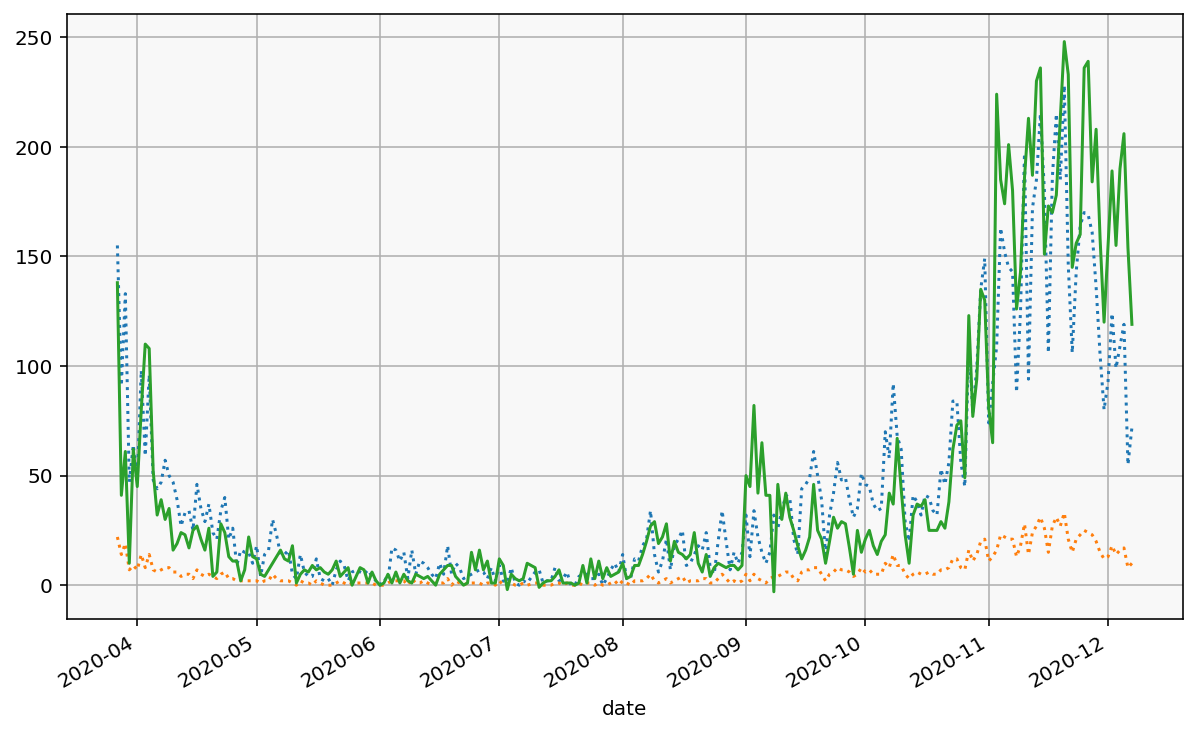

In [44]:
def get_subset(key, column="kommune_name"):
    """Extract a matching subset and compute the new cases"""
    subset = raw_data[raw_data[column] == key].groupby("date")

    total_cases = subset["cases"].sum()
    date = total_cases.index.to_series()
    total_cases.name = "total cases"
    total_per_100k = (subset["cases"].sum() / ((subset["population"].sum() + 1) / 1e5)).round(0)
    total_per_100k.name = "total cases per 100k"

    new_cases = total_cases.diff()
    new_cases.name = "new cases"
    new_per_100k = total_per_100k.diff()
    new_per_100k.name = "new cases per 100k"

    return pd.concat(
        [date, total_cases, new_cases, total_per_100k, new_per_100k], axis=1
    )


oslo = get_subset("Oslo")
oslo["new cases"].plot(x="date", linestyle=":")
oslo["new cases per 100k"].plot(x="date", linestyle=":")
viken = get_subset("Viken", column="fylke_name")
viken["new cases"].plot(x="date")


In [65]:
def plot_daily(subset, label=None, window=7, ymax=None, per_capita=False):
    """Altair plot of a subset of data

    scatter-plot daily cases with a trendline for rolling average
    """
    key = "new cases"
    if per_capita:
        key += " per 100k"
        label += " (per 100k)"
    if ymax is None:
        # use 300 for uniform comparability of all kommuner
        if per_capita:
            min_max = 50
        else:
            min_max = 300
        ymax = max(
            min_max,
            # round up to next smooth 100 line
            (subset[key].max() + 50) // 100 * 100,
        )

    line = (
        alt.Chart(
            subset, title=f"Daily new cases in {label} ({window}-day rolling average)"
        )
        .mark_line(
            color="red",
            size=3,
            tooltip=alt.TooltipContent("encoding"),
        )
        .transform_window(
            rolling_mean=f"mean({key})",
            frame=[-window // 2, window // 2],
        )
        .encode(
            x="date:T",
            y="rolling_mean:Q",
        )
    )

    points = (
        alt.Chart(subset)
        .mark_point(opacity=0.5)
        .encode(
            x="date:T",
            y=alt.Y(f"{key}:Q", scale=alt.Scale(domain=(0, ymax))),
            tooltip=[
                "date",
                "new cases",
                "total cases",
                "new cases per 100k",
                "total cases per 100k",
            ],
        )
    )

    return (points + line).interactive()


plot_daily(oslo, "Oslo")

alt.LayerChart(...)

In [66]:
plot_daily(oslo, "Oslo", per_capita=True)

alt.LayerChart(...)

In [67]:
plot_daily(norway, label="Norway") 

alt.LayerChart(...)

In [74]:
kommuner = df.groupby("kommune_name")["cases"].sum().sort_values(ascending=False)
kommuner

kommune_name
Oslo         1028147
Bergen        273773
Bærum         132511
Trondheim     103620
Drammen        90648
              ...   
Røyrvik            0
Røst               0
Berlevåg           0
Rødøy              0
Gamvik             0
Name: cases, Length: 358, dtype: int64

In [75]:
fylker = df.groupby("fylke_name")["cases"].sum().sort_values(ascending=False)
fylker

fylke_name
Oslo                    1028147
Viken                    923380
Vestland                 408873
Innlandet                174166
Trøndelag                165023
Rogaland                 164064
Agder                    115488
Vestfold og Telemark     109797
Troms og Finnmark         85074
Møre og Romsdal           58986
Nordland                  49334
Ukjent Fylke               8555
Svalbard                      0
Name: cases, dtype: int64

In [144]:
from IPython.display import display
from ipywidgets import Select, SelectMultiple, interact, interactive, HBox, VBox, Layout


item_selector = SelectMultiple(
    value=("Oslo", "Bærum", "Asker"),
    options=tuple(kommuner.index),
)

# store recent values so when we switch category, we remember the last selection
item_selector._recent_values = {
    "fylke": ("Oslo", "Viken"),
    "kommune": item_selector.value,
}

group_selector = Select(value="kommune", options=["fylke", "kommune"])


def change_group(change):
    # remember previous value for when we switch back
    item_selector._recent_values[change.old] = item_selector.value
    print("Saving", item_selector.value, change.old, change.new)
    if change.new == "fylke":
        new_options = tuple(fylker.index)
    elif change.new == "kommune":
        new_options = tuple(kommuner.index)
    else:
        return
    print(
        "Loading",
        change.old,
        change.new,
        item_selector._recent_values.get(change.new, ()),
    )

    item_selector.options = new_options
    item_selector.value = item_selector._recent_values.get(change.new, ())


group_selector.observe(change_group, "value")


# @interact(
#     level=group_selector,
#     regions=item_selector,
#     window=(1, 30),
# )
def plot_trends(level, regions, window=7):
    x_domain = alt.selection_interval(bind="scales", encodings=["x"])
    charts = [
        alt.hconcat(
            *(
                plot_daily(
                    norway,
                    label="Norway",
                    window=window,
                    per_capita=per_capita,
                ).add_selection(x_domain)
                for per_capita in (False, True)
            )
        )
    ]
    if isinstance(regions, str):
        regions = [regions]
    for r in regions:
        subset = get_subset(r, column=level + "_name")
        charts.append(
            alt.hconcat(
                *(
                    plot_daily(
                        subset,
                        label=r,
                        window=window,
                        per_capita=per_capita,
                    ).add_selection(x_domain)
                    for per_capita in (False, True)
                )
            )
        )
    display(alt.vconcat(*charts))


widget = interactive(
    plot_trends,
    level=group_selector,
    regions=item_selector,
    window=(1, 30),
)
controls = HBox(widget.children[:-1], layout=Layout(flex_flow="row wrap"))
output = widget.children[-1]
display(VBox([controls, output]))
widget.update()
# plot_trends(**widget.kwargs);